# Stepper Motor Model for Dynamic Simulation

## Importing libraries

In [1]:
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import numpy as np
import sys

## RL Circuit: Rectangular Pulses

### Circuit Parameters and funtion

In [2]:
R = 5.3 # In Ohms
L = 0.0125 # In Henrys
f = 10 # In Hertzs
T = 1/f # In seconds
v_high = 24 # In volts

def pulse(h_pulse):
    global t_pulse
        
    if 0<=t_pulse<T/2:
        v = v_high
        t_pulse += h_pulse
    elif T/2<=t_pulse<T:
        v = -v_high
        t_pulse += h_pulse
    else:
        v = 24
        t_pulse = 0
        
    return v    
    
def f(t,i,mode='Euler'):
    h_pulse = h
    if mode == 'RK4':
        h_pulse = h/4
    
    v = pulse(h_pulse)        
    i_present = i
    i_next = (1/L)*(v - R*i_present)
    return i_next

### Euler Method

In [3]:
# Initial Conditions
t_pulse = 0
i1 = 0

# Simulation Parameters
total_time1 = 2 #in seconds
steps1 = 1
t, h = 0., 0.0001

# Plotting Parameters
steps_to_save1 = int(total_time1/(h*steps1))
vt1 = np.zeros(steps_to_save1+2)
vy1 = np.zeros(steps_to_save1+2)
limit_t1 = 2

idx=0
vt1[idx] = t
vy1[idx] = i1
idx += 1
while t<total_time1:
    for step in range(steps1):
        k1 = f(t, i1)
        i1 += h*k1
        t += h
        
    #print("At", t, "=> Current is", i1)
    vt1[idx] = t
    vy1[idx] = i1
    idx += 1

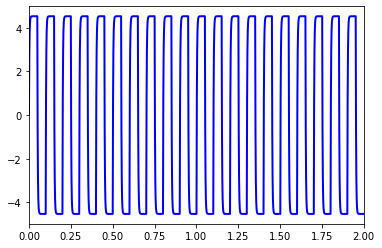

In [4]:
plt.plot(vt1, vy1, lw=2, c='Blue')
plt.xlim(0.,limit_t1)
plt.show()

### Runge-Kutta

In [5]:
# Initial Conditions
t_pulse = 0
i2 = 0

# Simulation Parameters
total_time2 = 2 #in seconds
steps2 = 1
t, h = 0., 0.001

# Plotting Parameters
steps_to_save2 = int(total_time2/(h*steps2))
vt2 = np.zeros(steps_to_save2+2)
vy2 = np.zeros(steps_to_save2+2)
limit_t2 = 0.5

idx=0
vt2[idx] = t
vy2[idx] = i2
idx += 1
while t<total_time2:
    for step in range(steps2):
        k1 = f(t, i2, 'RK4')
        k2 = f(t+0.5*h, i2+0.5*h*k1, 'RK4')
        k3 = f(t+0.5*h, i2+0.5*h*k2, 'RK4')
        k4 = f(t+h, i2+h*k3, 'RK4')
        i2 += h/6.*(k1+2.*k2+2.*k3+k4)
        t += h
        
    #print("At", t, "=> Current is", i2)
    vt2[idx] = t
    vy2[idx] = i2
    idx += 1

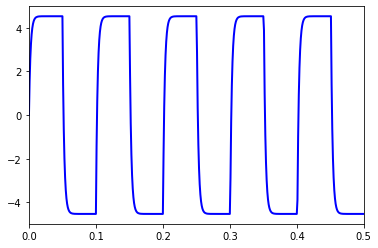

In [6]:
plt.plot(vt2, vy2, lw=2, c='Blue')
plt.xlim(0.,limit_t2)
plt.show()

## Decay Mode in High Torque

### Definitions

In [7]:
# Motor constants
R = 5.3 # In Ohms
L = 0.0125 # In Henrys
f = 1. # In Hertzs
T = 1/f # In seconds
v_high = 24 # In volts

def pulse2(t):
    global n_pulse
    
    #print("t = ", t)
    #print("n_pulse = ", n_pulse)
    #print("n_pulse*T/2 = ", n_pulse*T/2)
    #print("(n_pulse+1)*T/2 = ", (n_pulse+1)*T/2)
    #print("(n_pulse+2)*T/2 = ", (n_pulse+2)*T/2)
    #print("")
    
    if n_pulse*T/2 <= t and t < (n_pulse+1)*T/2:
        v = v_high
        #print("v = ", v)
        
    elif (n_pulse+1)*T/2 <= t and t < (n_pulse+2)*T/2:
        v = -v_high
        #print("v = ", v)
    
    elif (n_pulse+2)*T/2 <= t and t < (n_pulse+3)*T/2:
        v = v_high
        #print("v = ", v)
    
    else:
        sys.exit("Error")
        
    return v 

def f2(t, i, decay_mode):
    global t_decay
    
    #print("At t: ", t, "sec. The pulse: ", n_pulse, ". The voltage is: ", v)
    
    i_present = i
    
    if t_decay < t_off and decay_mode == 'sd':
        v = 0
        t_decay += h/4
    elif t_decay < t_off and decay_mode == 'fd':
        v = -pulse2(t)
        t_decay += h/4
    else:
        v = pulse2(t)
    
    i_next = (1/L)*(v - R*i_present)
    
    #print("At t: ", t, "sec. The pulse: ", n_pulse, ". The voltage is: ", v)
    
    return i_next

# Decay Mode constants
R_decay, C = 47000, 1e-9
t_off = R_decay * C
t_blank = 1400 * C
i_chop = 1.

### Fast Decay

In [8]:
# Initial Conditions
n_pulse, next_pulse = 0, 0
i3 = 0

# Simulation Parameters
total_time3 = 2 #in seconds
steps3 = 1
t, h = 0., 1e-4
t_decay = 1.

# Plotting Parameters
steps_to_save3 = int(total_time3/(h*steps3))
vt3 = np.zeros(steps_to_save3+2)
vy3 = np.zeros(steps_to_save3+2)
limit_t3 = 0.1

# First step of the simulation
idx=0
vt3[idx] = t
vy3[idx] = i3
idx += 1

while t<total_time3:
    for step in range(steps3):
        
        decay_mode = 'fd'
        k1 = f2(t, i3, decay_mode)
        k2 = f2(t+0.5*h, i3+0.5*h*k1, decay_mode)
        k3 = f2(t+0.5*h, i3+0.5*h*k2, decay_mode)
        k4 = f2(t+h, i3+h*k3, decay_mode)
        
        i3 += h/6.*(k1+2.*k2+2.*k3+k4)
        
        t += h
        
        if t >= (next_pulse+1)*T:
            n_pulse += 2
            next_pulse = n_pulse/2
            #print("At ", t, "sec, the pulse:", next_pulse)
        
        if i3 > i_chop or i3 < -i_chop:
            t_decay = 0.
        
        elif t_decay < t_off:
            continue
            
        else:
            t_decay = t_off+1
        
    #print("At", t, "=> Current is", i3, "Time Decay: ", t_decay)
    vt3[idx] = t
    vy3[idx] = i3
    idx += 1
    
vt3.sort()

<IPython.core.display.Javascript object>


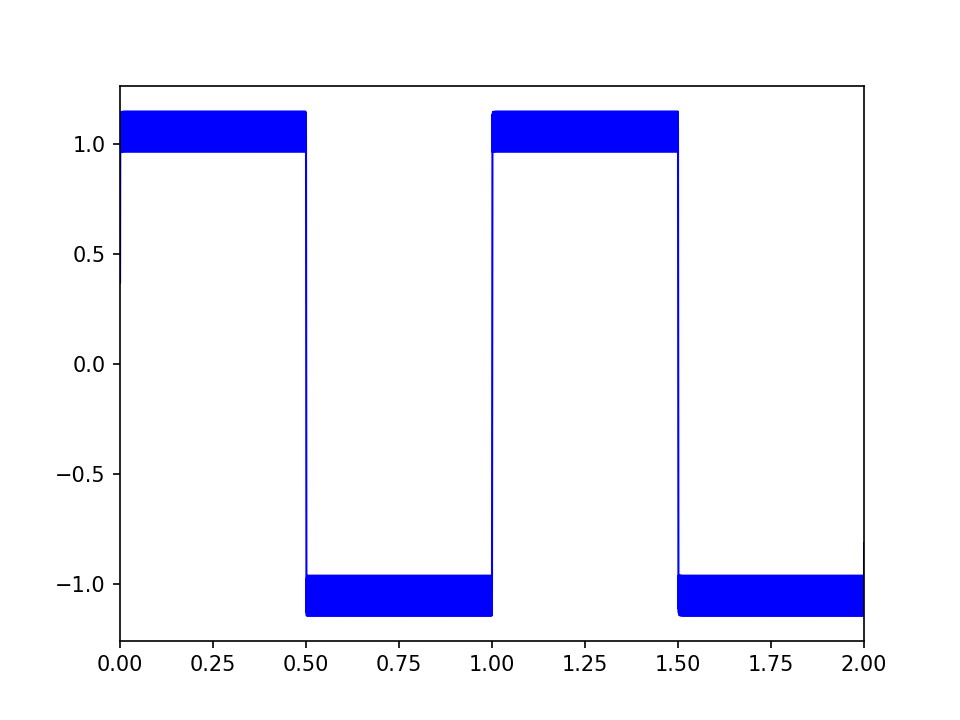

In [12]:
%matplotlib notebook

limit_t3 = 2*T
start = 0
plt.plot(vt3[total_time3:], vy3[total_time3:], lw=1, c='Blue')
plt.xlim(0.+start,limit_t3+start)
plt.show()

### Slow Decay

In [10]:
# Initial Conditions
n_pulse, next_pulse = 0, 0
i4 = 0

# Simulation Parameters
total_time4 = 2 #in seconds
steps4 = 1
t, h = 0., 1e-6
t_decay = 1.

# Plotting Parameters
steps_to_save4 = int(total_time4/(h*steps4))
vt4 = np.zeros(steps_to_save4+2)
vy4 = np.zeros(steps_to_save4+2)
limit_t4 = 0.1

# First step of the simulation
idx=0
vt4[idx] = t
vy4[idx] = i4
idx += 1

while t<total_time4:
    for step in range(steps4):
        
        decay_mode = 'sd'
        k1 = f2(t, i4, decay_mode)
        k2 = f2(t+0.5*h, i4+0.5*h*k1, decay_mode)
        k3 = f2(t+0.5*h, i4+0.5*h*k2, decay_mode)
        k4 = f2(t+h, i4+h*k3, decay_mode)
        
        i4 += h/6.*(k1+2.*k2+2.*k3+k4)
        
        t += h
        
        if t >= (next_pulse+1)*T:
            n_pulse += 2
            next_pulse = n_pulse/2
            #print("At ", t, "sec, the pulse:", next_pulse)
        
        if i4 > i_chop or i4 < -i_chop:
            t_decay = 0.
        
        elif t_decay < t_off:
            continue
            
        else:
            t_decay = t_off+1
        
    #print("At", t, "=> Current is", i3, "Time Decay: ", t_decay)
    vt4[idx] = t
    vy4[idx] = i4
    idx += 1

<IPython.core.display.Javascript object>


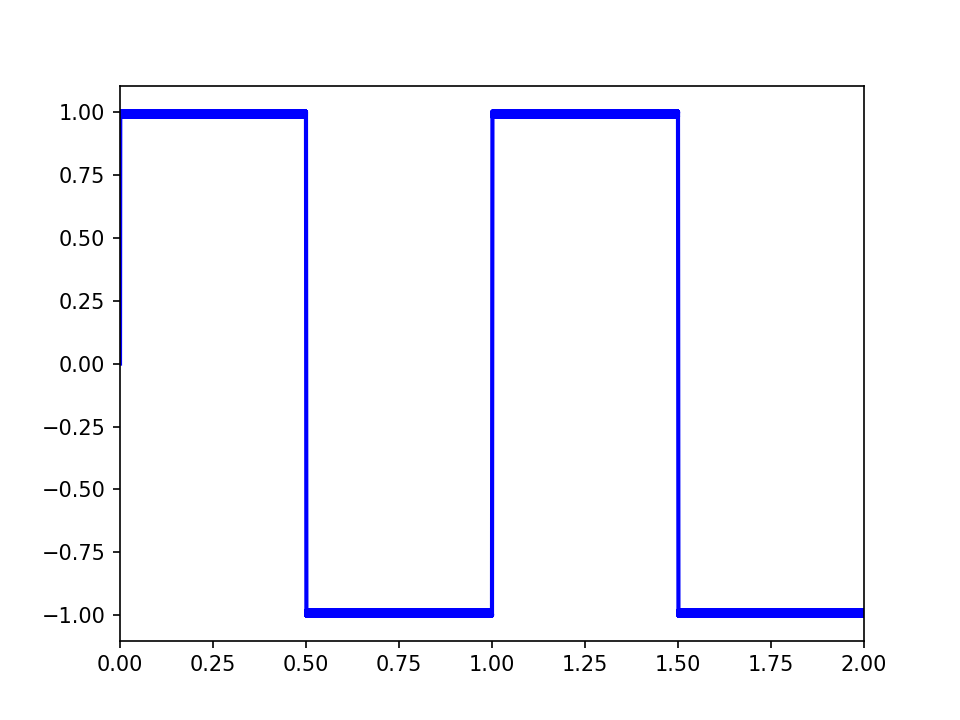

In [11]:
%matplotlib notebook
limit_t4 = 2*T
start = 0
plt.plot(vt4, vy4, lw=2, c='Blue')
plt.xlim(0.+start,limit_t4+start)
plt.show()